In [865]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
from PIL import Image
import matplotlib.image as mpimg
import pulp as p 
from ast import Constant
from sympy import symbols, solve, Eq
from sympy import *
from sympy.solvers.solveset import linsolve
from itertools import combinations
from scipy.optimize import linprog

# 1. The following table gives the elongation e in inches per inch (in./in.) for a given stress S on a steel wire measured in pounds per square inch (1b/$in^2$). Test the model e = $c_1$ S by plotting the data. Estimate $c_1$ graphically.

In [866]:
data = {'S': [5,10,20,30,40,50,60,70,80,90,100],
        'e': [0,19,57,94,134,173,216,256,297,343,390]}

In [867]:
df =pd.DataFrame(data)
df

,S,e
0,5,0
1,10,19
2,20,57
3,30,94
4,40,134
5,50,173
6,60,216
7,70,256
8,80,297
9,90,343


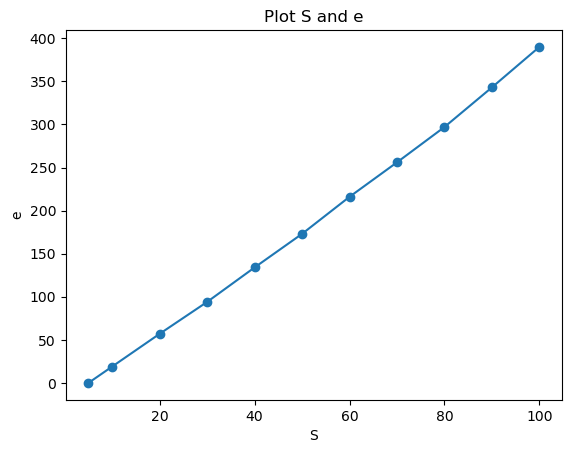

In [868]:
plt.plot(df['S'],df['e'])
plt.scatter(df['S'],df['e'])
plt.xlabel('S')
plt.ylabel('e')
plt.title('Plot S and e')
plt.show()

# Test the model e = $c_1$ S by plotting the data. Estimate $c_1$ graphically.

e = $c_1$ S 

There are (5,0) no proportional model.

So the best $c_1$ 

$\Delta e = c_1 \Delta S$

$c_1=\frac {\Delta e}{\Delta S}$ 

In [869]:
def change(df):
    data = [0,]
    for i in range(0,len(df)-1):
        data.append(df[i+1] - df[i])
    return data
    


In [870]:
df['c1']=df['e']/df['S']
df

,S,e,c1
0,5,0,0.000000
1,10,19,1.900000
2,20,57,2.850000
3,30,94,3.133333
4,40,134,3.350000
5,50,173,3.460000
6,60,216,3.600000
7,70,256,3.657143
8,80,297,3.712500
9,90,343,3.811111


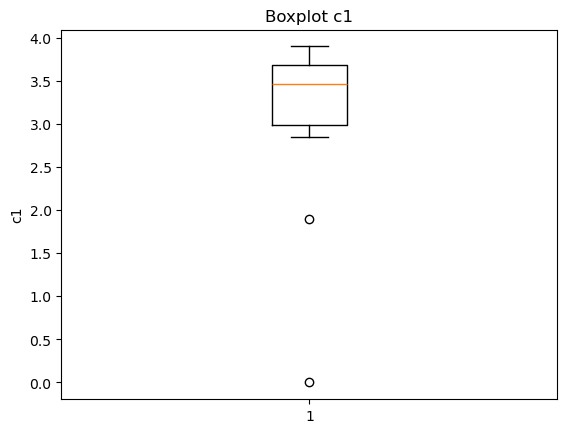

In [871]:
plt.boxplot(df['c1'])
plt.ylabel('c1')
plt.title('Boxplot c1')
plt.show()

The outliers are 0 and 1.9 .

In [872]:
print('Mean = ',round(df['c1'][2:].mean(),2))
print('Median = ',round(df['c1'][2:].median(),2))
print('Mode = ',statistics.mode(df['c1'][2:]))
print('Standard Deviation = ',df['c1'][2:].std())

Mean =  3.5
Median =  3.6
Mode =  2.85
Standard Deviation =  0.33867574608751394


We decide $c_1$ = mean = 3.5.

Model e = 3.5 S

In [873]:
df['e_Model']=3.5*df['S']
df

,S,e,c1,e_Model
0,5,0,0.000000,17.5
1,10,19,1.900000,35.0
2,20,57,2.850000,70.0
3,30,94,3.133333,105.0
4,40,134,3.350000,140.0
5,50,173,3.460000,175.0
6,60,216,3.600000,210.0
7,70,256,3.657143,245.0
8,80,297,3.712500,280.0
9,90,343,3.811111,315.0


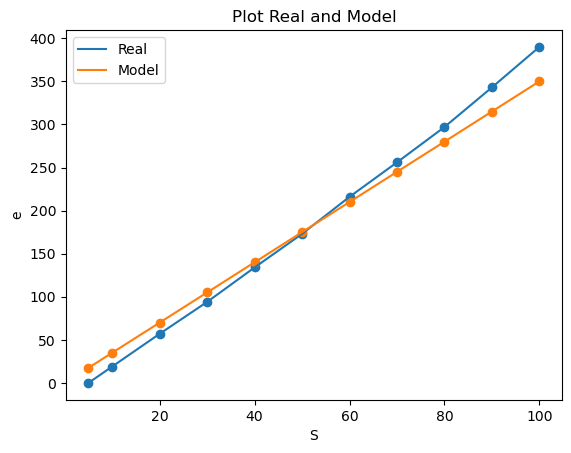

In [874]:
plt.plot(df['S'],df['e'],label='Real')
plt.plot(df['S'],df['e_Model'],label='Model')
plt.legend()
plt.scatter(df['S'],df['e'],label='Real')
plt.scatter(df['S'],df['e_Model'],label='Model')
plt.xlabel('S')
plt.ylabel('e')
plt.title('Plot Real and Model')
plt.show()

# 2. In the following data, x is the diameter of a ponderosa pine in inches measured at breast height and y is a measure of volume number of board feet divided by 10. Test the model y by plotting the transformed data. If the model seem reasonable, estimate the parameters a and b of the model graphically.

In [875]:
data = {'x': [ 17, 19, 20, 22, 23, 25, 28, 31, 32, 33, 36, 37, 38, 39, 41],
        'y': [19, 25, 32, 51, 57, 71, 113, 141, 123, 187, 192, 205, 252, 259, 294]}

In [876]:
df =pd.DataFrame(data)
df

,x,y
0,17,19
1,19,25
2,20,32
3,22,51
4,23,57
5,25,71
6,28,113
7,31,141
8,32,123
9,33,187


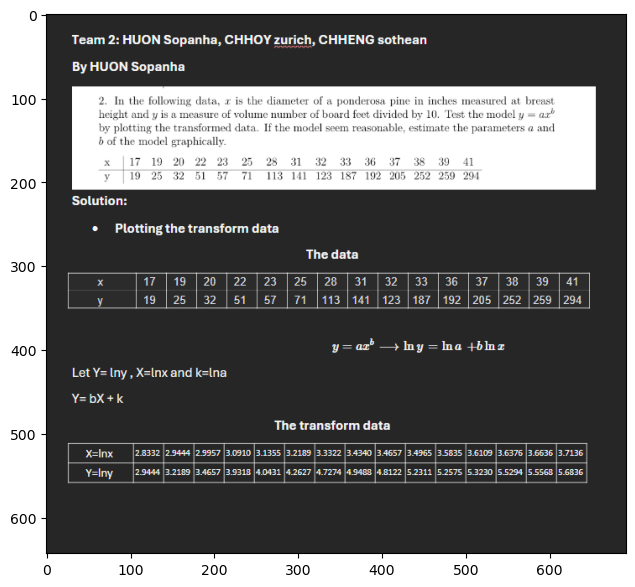

In [877]:
fig = plt.figure(figsize =(10, 7))
img = mpimg.imread('រូបថតអេក្រង់ 2024-11-24 145441.png')
imgplot = plt.imshow(img)
plt.show()

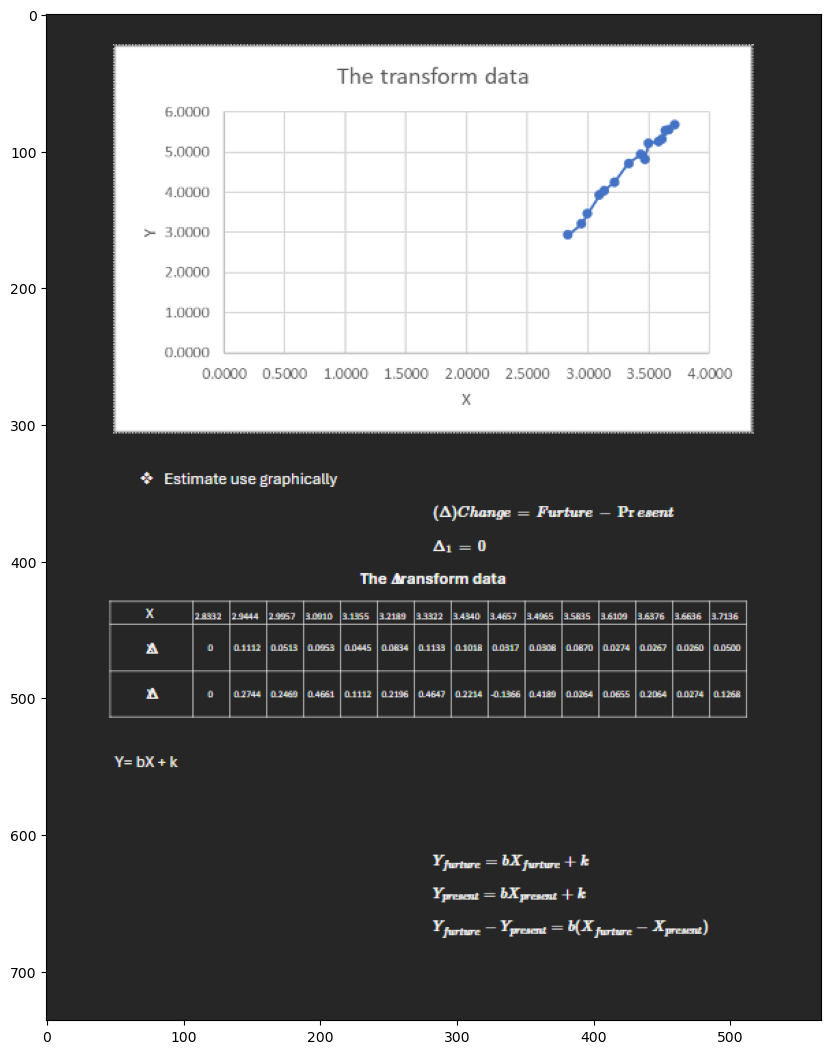

In [878]:
fig = plt.figure(figsize =(10, 20))
img = mpimg.imread('រូបថតអេក្រង់ 2024-11-24 145517.png')
imgplot = plt.imshow(img)
plt.show()

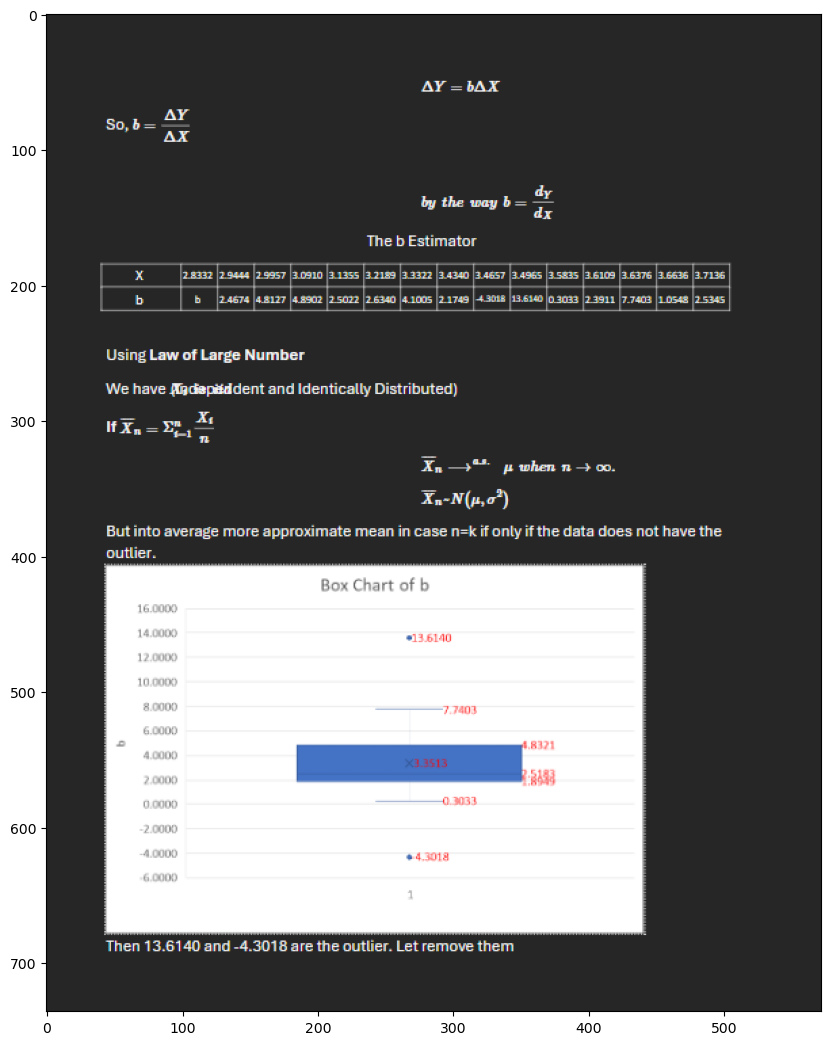

In [879]:
fig = plt.figure(figsize =(10, 20))
img = mpimg.imread('រូបថតអេក្រង់ 2024-11-24 145542.png')
imgplot = plt.imshow(img)
plt.show()

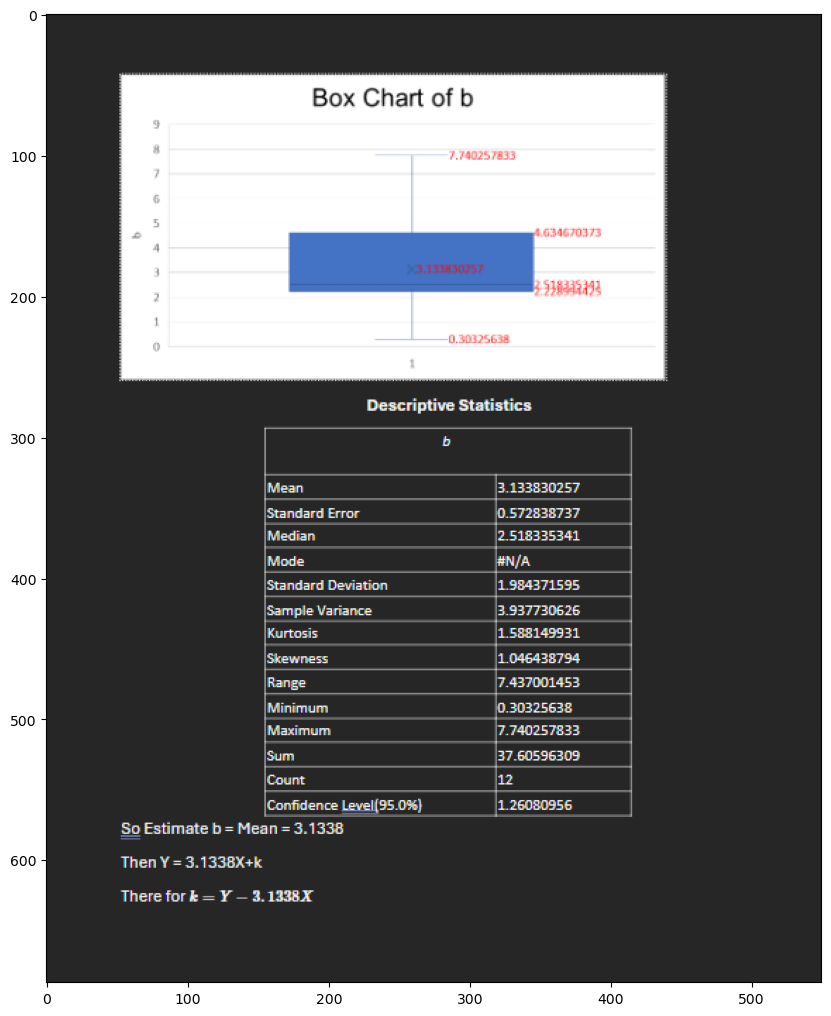

In [880]:
fig = plt.figure(figsize =(10, 20))
img = mpimg.imread('រូបថតអេក្រង់ 2024-11-24 145601.png')
imgplot = plt.imshow(img)
plt.show()

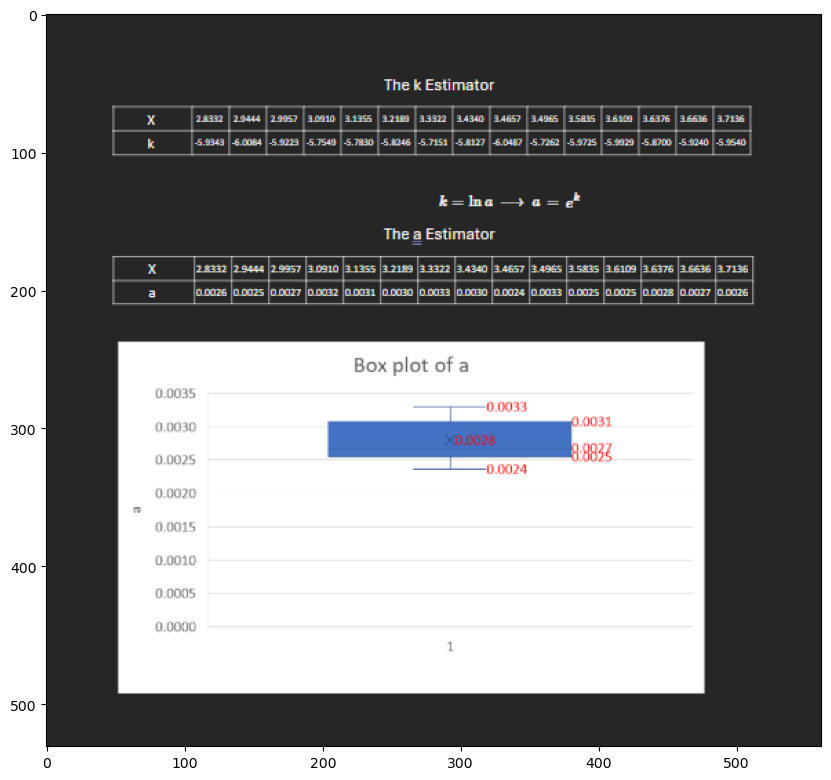

In [881]:
fig = plt.figure(figsize =(10, 20))
img = mpimg.imread('រូបថតអេក្រង់ 2024-11-24 145620.png')
imgplot = plt.imshow(img)
plt.show()

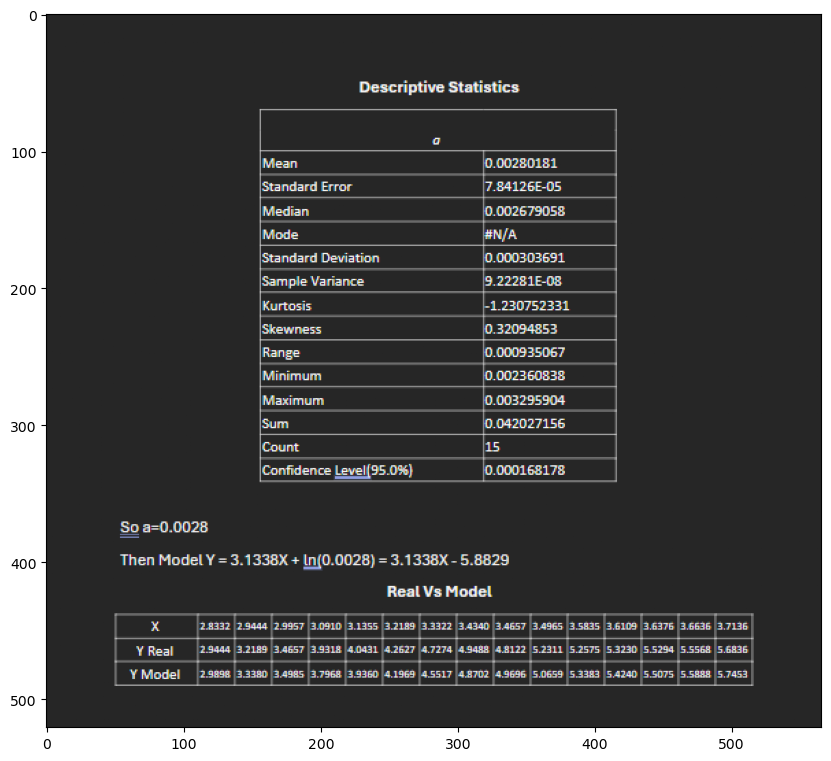

In [882]:
fig = plt.figure(figsize =(10, 20))
img = mpimg.imread('រូបថតអេក្រង់ 2024-11-24 145637.png')
imgplot = plt.imshow(img)
plt.show()

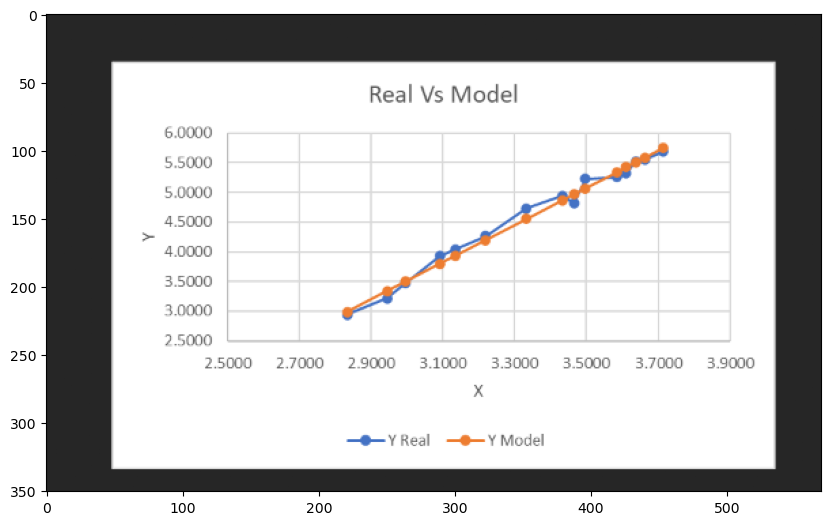

In [883]:
fig = plt.figure(figsize =(10, 20))
img = mpimg.imread('រូបថតអេក្រង់ 2024-11-24 145654.png')
imgplot = plt.imshow(img)
plt.show()

# 3. The following data represent (hypothetical) energy consumption normalized to the year 1900. Plot the data. Test the model Q = $ae^{bx}$ by plotting the transformed data. Estimate the pa- rameters of the model graphically.

In [884]:
def list(a,b,c):
    f=[]
    for i in range(a,b,c):
        f.append(i)
    return f


In [885]:
data = {'x': list(0,110,10),
        'Year': list(1900,2010,10),
        'ConsumptionQ': [1.00,2.01,4.06,8.17,16.44,33.12,66.69,134.29,270.43,544.57, 1096.63]}

In [886]:
df =pd.DataFrame(data)
df

,x,Year,ConsumptionQ
0,0,1900,1.00
1,10,1910,2.01
2,20,1920,4.06
3,30,1930,8.17
4,40,1940,16.44
5,50,1950,33.12
6,60,1960,66.69
7,70,1970,134.29
8,80,1980,270.43
9,90,1990,544.57


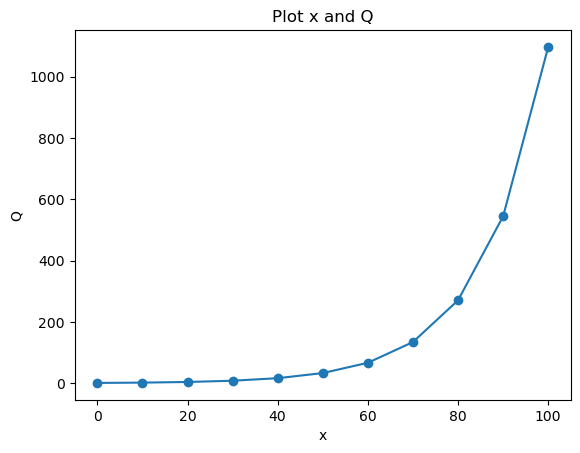

In [887]:
plt.plot(df['x'],df['ConsumptionQ'])
plt.scatter(df['x'],df['ConsumptionQ'])
plt.xlabel('x')
plt.ylabel('Q')
plt.title('Plot x and Q')
plt.show()

Model lnQ = lna + bx

$\Delta lnQ = b\Delta x$

$\to b = \frac{\Delta lnQ}{\Delta x}$

In [888]:
df['lnQ']= np.log(df['ConsumptionQ'])
df['change_lnQ']=change(df['lnQ'])
df['change_x']=change(df['x'])
df['b']=round(df['change_lnQ']/df['change_x'],2)
df

,x,Year,ConsumptionQ,lnQ,change_lnQ,change_x,b
0,0,1900,1.00,0.000000,0.000000,0,NaN
1,10,1910,2.01,0.698135,0.698135,10,0.07
2,20,1920,4.06,1.401183,0.703048,10,0.07
3,30,1930,8.17,2.100469,0.699286,10,0.07
4,40,1940,16.44,2.799717,0.699248,10,0.07
5,50,1950,33.12,3.500137,0.700420,10,0.07
6,60,1960,66.69,4.200055,0.699918,10,0.07
7,70,1970,134.29,4.900002,0.699947,10,0.07
8,80,1980,270.43,5.600013,0.700012,10,0.07
9,90,1990,544.57,6.299996,0.699983,10,0.07


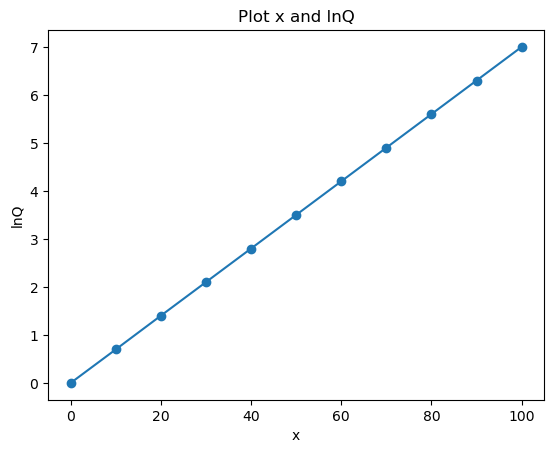

In [889]:
plt.plot(df['x'],df['lnQ'])
plt.scatter(df['x'],df['lnQ'])
plt.xlabel('x')
plt.ylabel('lnQ')
plt.title('Plot x and lnQ')
plt.show()

So b = 0.07

In [890]:
df['a']=round(df['lnQ']-0.07*df['x'],2)
df

,x,Year,ConsumptionQ,lnQ,change_lnQ,change_x,b,a
0,0,1900,1.00,0.000000,0.000000,0,NaN,0.0
1,10,1910,2.01,0.698135,0.698135,10,0.07,-0.0
2,20,1920,4.06,1.401183,0.703048,10,0.07,0.0
3,30,1930,8.17,2.100469,0.699286,10,0.07,0.0
4,40,1940,16.44,2.799717,0.699248,10,0.07,-0.0
5,50,1950,33.12,3.500137,0.700420,10,0.07,0.0
6,60,1960,66.69,4.200055,0.699918,10,0.07,0.0
7,70,1970,134.29,4.900002,0.699947,10,0.07,0.0
8,80,1980,270.43,5.600013,0.700012,10,0.07,0.0
9,90,1990,544.57,6.299996,0.699983,10,0.07,-0.0


So lna = 0 then a = 1

Model $Q=e^{0.07x}$

In [891]:
df['Q_Model']= np.exp(0.07*df['x'])
df

,x,Year,ConsumptionQ,lnQ,change_lnQ,change_x,b,a,Q_Model
0,0,1900,1.00,0.000000,0.000000,0,NaN,0.0,1.000000
1,10,1910,2.01,0.698135,0.698135,10,0.07,-0.0,2.013753
2,20,1920,4.06,1.401183,0.703048,10,0.07,0.0,4.055200
3,30,1930,8.17,2.100469,0.699286,10,0.07,0.0,8.166170
4,40,1940,16.44,2.799717,0.699248,10,0.07,-0.0,16.444647
5,50,1950,33.12,3.500137,0.700420,10,0.07,0.0,33.115452
6,60,1960,66.69,4.200055,0.699918,10,0.07,0.0,66.686331
7,70,1970,134.29,4.900002,0.699947,10,0.07,0.0,134.289780
8,80,1980,270.43,5.600013,0.700012,10,0.07,0.0,270.426407
9,90,1990,544.57,6.299996,0.699983,10,0.07,-0.0,544.571910


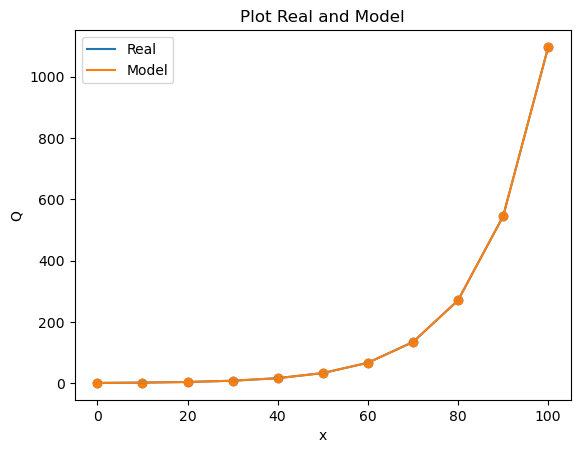

In [892]:
plt.plot(df['x'],df['ConsumptionQ'],label='Real')
plt.plot(df['x'],df['Q_Model'],label='Model')
plt.legend()
plt.scatter(df['x'],df['ConsumptionQ'],label='Real')
plt.scatter(df['x'],df['Q_Model'],label='Model')
plt.xlabel('x')
plt.ylabel('Q')
plt.title('Plot Real and Model')
plt.show()

# 4. Using elementary calculus, show that the minimum and maximum points for y = f(x) occur among the minimum and maximum point for y=$f^2$(x). Assuming f(x) > 0. why can we minimize f(x) by minimizing $f^2$(x)?

# show that the minimum and maximum points for y = f(x) occur among the minimum and maximum point for y=$f^2$(x). 

Let y = f(x)

And $Y =f^2(x)$

$Y'=2f'(x) f(x)$

But $y'=f'(x)$

Then $Y'=2y'f(x)$

By $f(x)\ge0$

So $sign(Y') = sign(y')$

By the way $Y'=2y'f(x) = 0 \to y'= 0 \quad or \quad f(x)=0$ 

if Y' = 0 , then  y'=0. it mean Y have maximum or minimum, then y is also.

Thus the minimum and maximum points for y = f(x) occur among the minimum and maximum point for Y=$f^2$(x). 

# why can we minimize f(x) by minimizing $f^2$(x)?

Because the minimum and maximum points for y = f(x) occur among the minimum and maximum point for Y=$f^2$(x)

# 5. For each of the following data sets, formulate the mathematical model that minimizes the largest deviation between the data and the line y = ax + b. If a computer is available, solve for the estimates of a and b.

$Min_{parameter}(Max_{data}(|y_i-f(x_i)|))$

where $y_i$ is the true value, $f(x_i)$ is the predicted value

$Minimize_{parameter} R$

Let $R = Max_{data}(|y_i-f(x_i)|) $

$R\ge 0$

st. $|R_i|\ge R$

$R_i=y_i-f(x_i)$ 

$-R \le R_i\le R$

$-R_i \le R$

$R_i\le R$

There are 2n constraint. $i\in[1,n].$

In [893]:
def minimize2(d1,d2):
    # Data
    x = np.array(d1)
    y = np.array(d2)
    n = len(x)

    # Linear programming setup
    # Decision variables: [a, b, z]
    c = [0, 0, 1]  # Minimize z

    # Constraints
    A = []
    b_ub = []


    for i in range(n):
        A.append([-x[i], -1, -1])  # y_i - ax_i - b <= z
        A.append([x[i], 1, -1])   # -y_i + ax_i + b <= z
        b_ub.append(-y[i])
        b_ub.append(y[i])

    # Solve the linear program
    result = linprog(c, A_ub=A, b_ub=b_ub, bounds=(None, None))

    # Extract results
    a, b, z = result.x
    print(f"Optimal parameters: a = {a:.4f}, b = {b:.4f} , maximum deviation = {z:.4f}")

In [894]:
data = {'x': [1.0, 2.3, 3.7, 4.2, 6.1, 7.0],
        'y': [ 3.6, 3.0, 3.2, 5.1, 5.3, 6.8]}

In [895]:
df=pd.DataFrame(data)
df

,x,y
0,1.0,3.6
1,2.3,3.0
2,3.7,3.2
3,4.2,5.1
4,6.1,5.3
5,7.0,6.8


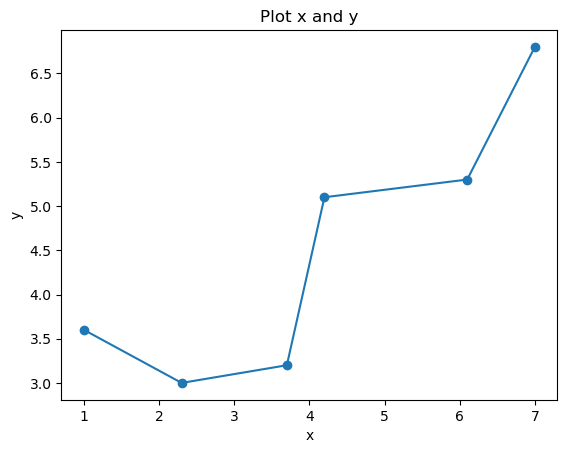

In [896]:
plt.plot(df['x'],df['y'])
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot x and y')
plt.show()

In [897]:
def finda_and_b(cx,cy,x,y):
    a=round(cy/cx,4)
    b=y-a*x
    return a,b


In [898]:
minimize2(df['x'],df['y'])

Optimal parameters: a = 0.5333, b = 2.1467 , maximum deviation = 0.9200


In [899]:
def maximize(a,b,df):
    e=[]
    for i in range(len(df)):
        e.append(abs(df['y'][i]-a*df['x'][i]-b))
    return max(e)

In [900]:
df['Model']=0.5333*df['x']+2.1467
df

,x,y,Model
0,1.0,3.6,2.68000
1,2.3,3.0,3.37329
2,3.7,3.2,4.11991
3,4.2,5.1,4.38656
4,6.1,5.3,5.39983
5,7.0,6.8,5.87980


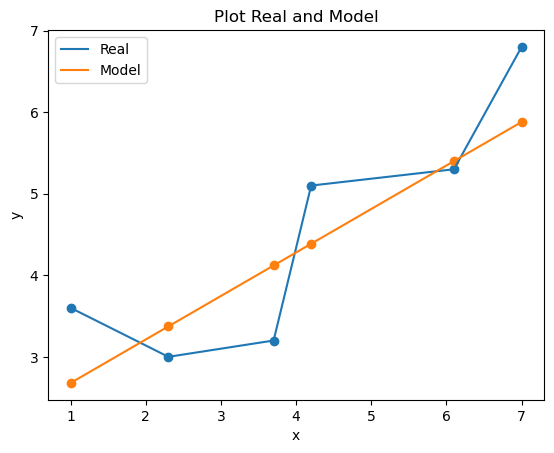

In [901]:
plt.plot(df['x'],df['y'],label='Real')
plt.plot(df['x'],df['Model'],label='Model')
plt.legend()
plt.scatter(df['x'],df['y'],label='Real')
plt.scatter(df['x'],df['Model'],label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot Real and Model')
plt.show()

In [902]:
data = {'x': [29.1, 48.2 ,72.7, 92.0, 118, 140, 165, 190],
        'y': [ 0.0493, 0.0821, 0.123, 0.154, 0.197, 0.234, 0.274, 0.328]}

In [903]:
df=pd.DataFrame(data)
df

,x,y
0,29.1,0.0493
1,48.2,0.0821
2,72.7,0.1230
3,92.0,0.1540
4,118.0,0.1970
5,140.0,0.2340
6,165.0,0.2740
7,190.0,0.3280


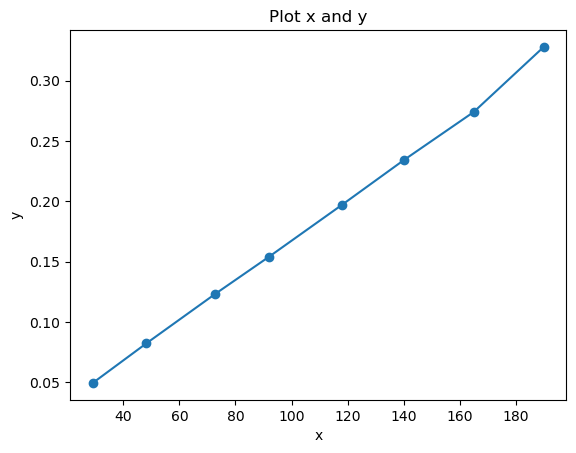

In [904]:
plt.plot(df['x'],df['y'])
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot x and y')
plt.show()

In [905]:
minimize2(df['x'],df['y'])

Optimal parameters: a = 0.0017, b = -0.0065 , maximum deviation = 0.0053


In [906]:
df['Model']=0.0017*df['x']-0.00065
df

,x,y,Model
0,29.1,0.0493,0.04882
1,48.2,0.0821,0.08129
2,72.7,0.1230,0.12294
3,92.0,0.1540,0.15575
4,118.0,0.1970,0.19995
5,140.0,0.2340,0.23735
6,165.0,0.2740,0.27985
7,190.0,0.3280,0.32235


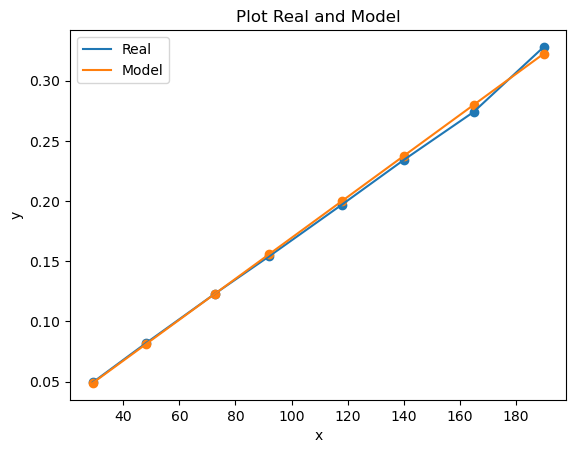

In [907]:
plt.plot(df['x'],df['y'],label='Real')
plt.plot(df['x'],df['Model'],label='Model')
plt.legend()
plt.scatter(df['x'],df['y'],label='Real')
plt.scatter(df['x'],df['Model'],label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot Real and Model')
plt.show()

In [908]:
data = {'x': [ 2.5, 3.0 ,3.5 ,4.0, 4.5, 5.0, 5.5],
        'y': [ 4.32 ,4.83, 5.27, 5.74, 6.26, 6.79, 7.23]}
df=pd.DataFrame(data)
df

,x,y
0,2.5,4.32
1,3.0,4.83
2,3.5,5.27
3,4.0,5.74
4,4.5,6.26
5,5.0,6.79
6,5.5,7.23


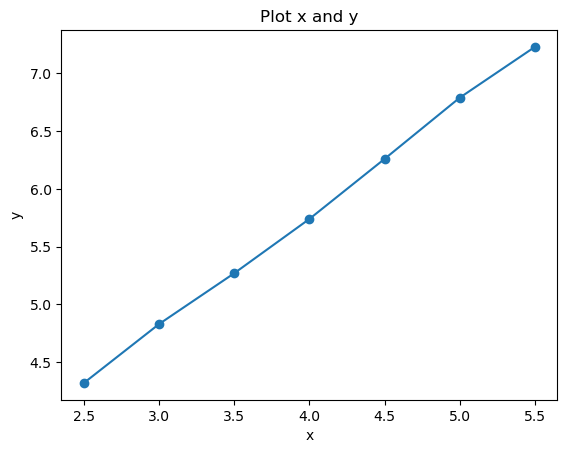

In [909]:
plt.plot(df['x'],df['y'])
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot x and y')
plt.show()

In [910]:
minimize2(df['x'],df['y'])

Optimal parameters: a = 0.9800, b = 1.8550 , maximum deviation = 0.0350


In [911]:
df['Model']=0.98*df['x']+1.850
df

,x,y,Model
0,2.5,4.32,4.30
1,3.0,4.83,4.79
2,3.5,5.27,5.28
3,4.0,5.74,5.77
4,4.5,6.26,6.26
5,5.0,6.79,6.75
6,5.5,7.23,7.24


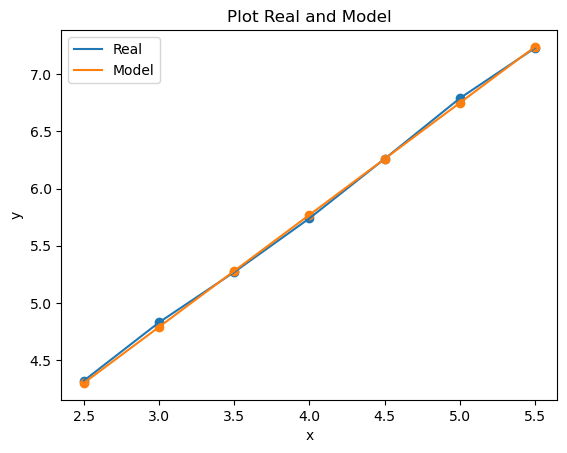

In [912]:
plt.plot(df['x'],df['y'],label='Real')
plt.plot(df['x'],df['Model'],label='Model')
plt.legend()
plt.scatter(df['x'],df['y'],label='Real')
plt.scatter(df['x'],df['Model'],label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot Real and Model')
plt.show()

# 6. For the folowing data, formulate the mathematical model that minimizes the largeast devi- ation between the data and the model y = $C_1x^2+C_2x+C_3$. If a computer is available, solve for the estimates of $c_1, c_2 and c_3$.

In [913]:
data = {'x': [ 0.1,0.2,0.3,0.4,0.5],
        'y': [ 0.06,0.12,0.36,0.65,0.95]}
df=pd.DataFrame(data)
df

,x,y
0,0.1,0.06
1,0.2,0.12
2,0.3,0.36
3,0.4,0.65
4,0.5,0.95


In [914]:

def minimize(d1,d2):
    # Data
    x = np.array(d1)
    y = np.array(d2)
    n = len(x)

    # Linear programming setup
    # Decision variables: [a, b, z]
    c = [0,0, 0, 1]  # Minimize z

    # Constraints
    A = []
    b_ub = []


    for i in range(n):
        A.append([-(x[i])**2,-x[i], -1, -1])  # y_i - ax_i - b <= z
        A.append([(x[i])**2,x[i], 1, -1])   # -y_i + ax_i + b <= z
        b_ub.append(-y[i])
        b_ub.append(y[i])

    # Solve the linear program
    result = linprog(c, A_ub=A, b_ub=b_ub, bounds=(None, None))

    # Extract results
    a, b,d, z = result.x
    print(f"Optimal parameters: a = {a:.4f}, b = {b:.4f} , c={d:.4f}, maximum deviation = {z:.4f}")


In [915]:
minimize([0.1,0.2,0.3,0.4,0.5],[ 0.06,0.12,0.36,0.65,0.95])

Optimal parameters: a = 4.0000, b = -0.0333 , c=-0.0050, maximum deviation = 0.0283


In [916]:
df['Model']=4*(df['x'])**2-0.0333*df['x']-0.005
df

,x,y,Model
0,0.1,0.06,0.03167
1,0.2,0.12,0.14834
2,0.3,0.36,0.34501
3,0.4,0.65,0.62168
4,0.5,0.95,0.97835


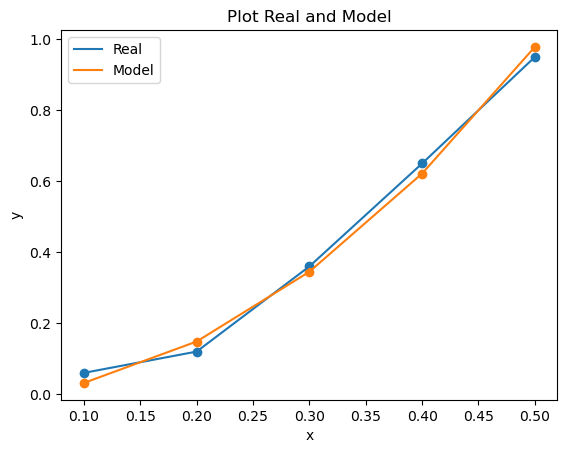

In [917]:
plt.plot(df['x'],df['y'],label='Real')
plt.plot(df['x'],df['Model'],label='Model')
plt.legend()
plt.scatter(df['x'],df['y'],label='Real')
plt.scatter(df['x'],df['Model'],label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot Real and Model')
plt.show()

# 7. Use Equations (3.5) and (3.6) to estimate the coefficients of the line y = ax + b such that the sum of the squared deviations between the line and the following data points is minimized.

In [918]:
def e1(df):
    df['xy']=df['x']*df['y']
    df['xsquare']=df['x']**2
    return (len(df)*sum(df['xy'])-sum(df['x'])*sum(df['y']))/(len(df)*sum(df['xsquare'])-(sum(df['x'])**2))


In [919]:
def e2(df):
    df['xy']=df['x']*df['y']
    df['xsquare']=df['x']**2
    return ((sum(df['xsquare']))*sum(df['y'])-sum(df['xy'])*sum(df['x']))/(len(df)*sum(df['xsquare'])-(sum(df['x'])**2))

In [920]:
def add_model(df,a,b):
    df['Model'] = a*df['x']+b
    df['d']=abs(df['y']-df['Model'])
    return df


In [921]:
def find_D(df):
    return sqrt(sum((df['d'])**2)/len(df))

In [922]:
def find_dmax(df):
    return max(df['d'])


In [923]:
data = {'x': [1.0, 2.3, 3.7, 4.2, 6.1, 7.0],
        'y': [ 3.6, 3.0, 3.2, 5.1, 5.3, 6.8]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,3.6
1,2.3,3.0
2,3.7,3.2
3,4.2,5.1
4,6.1,5.3
5,7.0,6.8


In [924]:
a = e1(df)
b = e2(df)
print('a = ',a,' , b = ',b)

a =  0.5642337202439501  , b =  2.214853433012


In [925]:
df=add_model(df,a,b)
df

,x,y,xy,xsquare,Model,d
0,1.0,3.6,3.60,1.00,2.779087,0.820913
1,2.3,3.0,6.90,5.29,3.512591,0.512591
2,3.7,3.2,11.84,13.69,4.302518,1.102518
3,4.2,5.1,21.42,17.64,4.584635,0.515365
4,6.1,5.3,32.33,37.21,5.656679,0.356679
5,7.0,6.8,47.60,49.00,6.164489,0.635511


In [926]:
D = find_D(df)
dmax=find_dmax(df)
print('D = ',D,' , dmax = ',dmax)

D =  0.701057350447849  , dmax =  1.1025181979146152


Then $0.701\le c_{max} \le 1.102$

$c_{max}$ = 0.9200

It is true $c_{max}\in [0.701,1.102]$

In [927]:
data = {'x': [29.1, 48.2 ,72.7, 92.0, 118, 140, 165, 190],
        'y': [ 0.0493, 0.0821, 0.123, 0.154, 0.197, 0.234, 0.274, 0.328]}
df = pd.DataFrame(data)
df

,x,y
0,29.1,0.0493
1,48.2,0.0821
2,72.7,0.1230
3,92.0,0.1540
4,118.0,0.1970
5,140.0,0.2340
6,165.0,0.2740
7,190.0,0.3280


In [928]:
a = e1(df)
b = e2(df)
print('a = ',a,'b = ',b)

a =  0.0016966485136475915 b =  -0.0011543098960862684


In [929]:
df=add_model(df,a,b)
df

,x,y,xy,xsquare,Model,d
0,29.1,0.0493,1.43463,846.81,0.048218,0.001082
1,48.2,0.0821,3.95722,2323.24,0.080624,0.001476
2,72.7,0.1230,8.94210,5285.29,0.122192,0.000808
3,92.0,0.1540,14.16800,8464.00,0.154937,0.000937
4,118.0,0.1970,23.24600,13924.00,0.199050,0.002050
5,140.0,0.2340,32.76000,19600.00,0.236376,0.002376
6,165.0,0.2740,45.21000,27225.00,0.278793,0.004793
7,190.0,0.3280,62.32000,36100.00,0.321209,0.006791


In [930]:
D = find_D(df)
dmax=find_dmax(df)
print('D = ',D,' , dmax = ',dmax)

D =  0.00323689381947361  , dmax =  0.006791092303043922


Then $0.0032\le c_{max} \le 0.0068$

$c_{max}$ = 0.0053

It is true $c_{max}\in [0.0032,0.0068]$

In [931]:
data = {'x': [ 2.5, 3.0 ,3.5 ,4.0, 4.5, 5.0, 5.5],
        'y': [ 4.32 ,4.83, 5.27, 5.74, 6.26, 6.79, 7.23]}
df=pd.DataFrame(data)
df

,x,y
0,2.5,4.32
1,3.0,4.83
2,3.5,5.27
3,4.0,5.74
4,4.5,6.26
5,5.0,6.79
6,5.5,7.23


In [932]:
a = e1(df)
b = e2(df)
print('a = ',a,'b = ',b)

a =  0.9742857142857191 b =  1.8799999999999792


In [933]:
df=add_model(df,a,b)
df

,x,y,xy,xsquare,Model,d
0,2.5,4.32,10.800,6.25,4.315714,0.004286
1,3.0,4.83,14.490,9.00,4.802857,0.027143
2,3.5,5.27,18.445,12.25,5.290000,0.020000
3,4.0,5.74,22.960,16.00,5.777143,0.037143
4,4.5,6.26,28.170,20.25,6.264286,0.004286
5,5.0,6.79,33.950,25.00,6.751429,0.038571
6,5.5,7.23,39.765,30.25,7.238571,0.008571


In [934]:
D = find_D(df)
dmax=find_dmax(df)
print('D = ',D,' , dmax = ',dmax)

D =  0.0242436610692533  , dmax =  0.03857142857142559


Then $0.0242\le c_{max} \le 0.038$

$c_{max}$ = 0.0350

It is true $c_{max}\in [0.0242,0.038]$

# 8. Make an appropriate transformation to fit the model $P = ae^{bt}$ using Equation (3.4). Esti- mate a and b.

Transform $lnP = lna + bt$

let $Y=lnP \quad and \quad k=lna$

$Y = bt + k$

In [935]:
data = {'t': [ 7, 14, 21, 28 ,35 ,42],
        'P': [ 8 ,41 ,133 ,250, 280 ,297]}
df = pd.DataFrame(data)
df['Y']=np.log(df['P'])
df

,t,P,Y
0,7,8,2.079442
1,14,41,3.713572
2,21,133,4.890349
3,28,250,5.521461
4,35,280,5.634790
5,42,297,5.693732


In [936]:
df['tY']=df['t']*df['Y']
df['tsquare']=df['t']**2
df

,t,P,Y,tY,tsquare
0,7,8,2.079442,14.556091,49
1,14,41,3.713572,51.990009,196
2,21,133,4.890349,102.697332,441
3,28,250,5.521461,154.600906,784
4,35,280,5.634790,197.217636,1225
5,42,297,5.693732,239.136750,1764


In [937]:
a,b = symbols('a,b')
linsolve([a*sum(df['tsquare'])+b*sum(df['t'])-sum(df['tY']),a*sum(df['t'])+len(df)*b-sum(df['Y'])],(a,b))
print('b = 0.0999 , k = 2.1423')

b = 0.0999 , k = 2.1423


Y = 0.0999t + 2.1423

$a=e^k$

In [938]:
df['Model_transforme']=0.0999*df['t']+2.1423
df

,t,P,Y,tY,tsquare,Model_transforme
0,7,8,2.079442,14.556091,49,2.8416
1,14,41,3.713572,51.990009,196,3.5409
2,21,133,4.890349,102.697332,441,4.2402
3,28,250,5.521461,154.600906,784,4.9395
4,35,280,5.634790,197.217636,1225,5.6388
5,42,297,5.693732,239.136750,1764,6.3381


In [939]:
print('a = ',math.exp(2.1423))

a =  8.519008833690448


$P = 8.52e^{0.0999t}$

In [940]:
df['Model']=8.52*(np.exp(0.0999*df['t']))
df

,t,P,Y,tY,tsquare,Model_transforme,Model
0,7,8,2.079442,14.556091,49,2.8416,17.145167
1,14,41,3.713572,51.990009,196,3.5409,34.501967
2,21,133,4.890349,102.697332,441,4.2402,69.429812
3,28,250,5.521461,154.600906,784,4.9395,139.716636
4,35,280,5.634790,197.217636,1225,5.6388,281.157874
5,42,297,5.693732,239.136750,1764,6.3381,565.786241


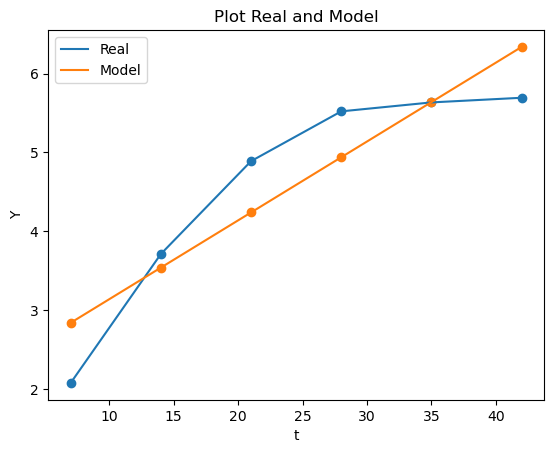

In [941]:
plt.plot(df['t'],df['Y'],label='Real')
plt.plot(df['t'],df['Model_transforme'],label='Model')
plt.legend()
plt.scatter(df['t'],df['Y'],label='Real')
plt.scatter(df['t'],df['Model_transforme'],label='Model')
plt.xlabel('t')
plt.ylabel('Y')
plt.title('Plot Real and Model')
plt.show()

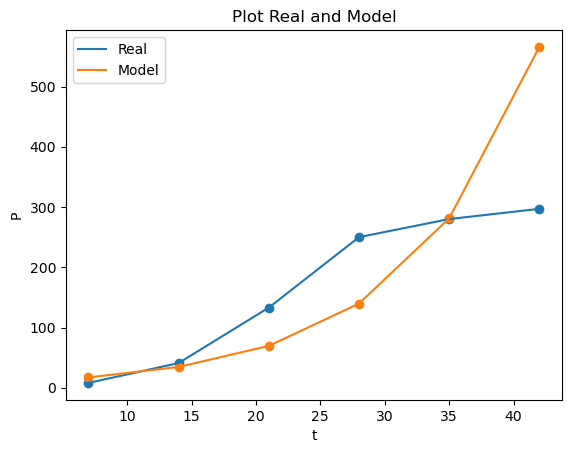

In [942]:
plt.plot(df['t'],df['P'],label='Real')
plt.plot(df['t'],df['Model'],label='Model')
plt.legend()
plt.scatter(df['t'],df['P'],label='Real')
plt.scatter(df['t'],df['Model'],label='Model')
plt.xlabel('t')
plt.ylabel('P')
plt.title('Plot Real and Model')
plt.show()

# 9. Find a model using the least-squares criterion either on the data or on the transformed data (as appropriate). Compare your results with the graphical fits obtained in the problem set 3.1 by computing the deviations, the maximum absolute deviation, and the sum of the squared deviations for each model. Find a bound on Cmax if the model was fit using the least-squares criterion.
# a. Problem 4a in Section 3.1 
# b. Problem 4b in Section 3.1

# a. Problem 4a in Section 3.1 

$P=av^b$

lnP = lna + blnv

let y = lnP 

$lna = k$
    
$lnv = x$

y = bx+k

In [943]:
data = {'v': [ 2.27 ,2.76 ,3.27 ,3.31 ,3.70 ,3.85 ,4.31 ,4.39 ,4.42, 4.81, 4.90, 5.05, 5.21, 5.62, 5.88],
        'P': [ 2500, 365, 23700, 5491, 14000, 78200, 70700, 138000, 304500, 341948, 49375, 260200, 867023, 1340000, 1092759]}
df = pd.DataFrame(data)
df

,v,P
0,2.27,2500
1,2.76,365
2,3.27,23700
3,3.31,5491
4,3.70,14000
5,3.85,78200
6,4.31,70700
7,4.39,138000
8,4.42,304500
9,4.81,341948


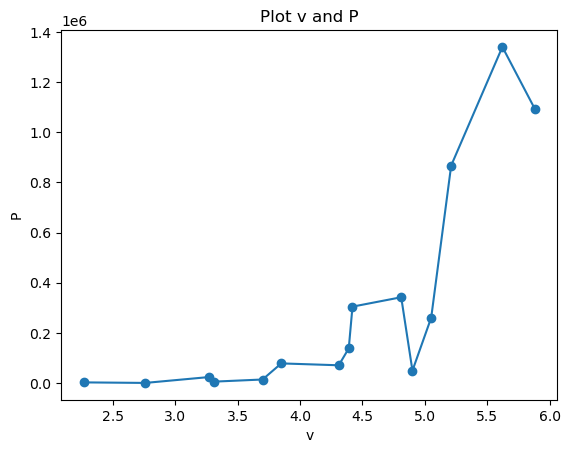

In [944]:
plt.plot(df['v'],df['P'])
plt.scatter(df['v'],df['P'])
plt.xlabel('v')
plt.ylabel('P')
plt.title('Plot v and P')
plt.show()

# Approximate by graph 

y = bx+k

k = y - bx

$\Delta y = b \Delta x$

$b = \frac{\Delta y}{\Delta x}$

In [945]:
df['y']=np.log(df['P'])
df['x']=np.log(df['v'])
df['change_y']=change(df['y'])
df['change_x']=change(df['x'])
df['b']=df['change_y']/df['change_x']
df

,v,P,y,x,change_y,change_x,b
0,2.27,2500,7.824046,0.819780,0.000000,0.000000,NaN
1,2.76,365,5.899897,1.015231,-1.924149,0.195451,-9.844668
2,3.27,23700,10.073230,1.184790,4.173333,0.169559,24.612822
3,3.31,5491,8.610866,1.196948,-1.462365,0.012158,-120.278012
4,3.70,14000,9.546813,1.308333,0.935947,0.111385,8.402837
5,3.85,78200,11.267025,1.348073,1.720212,0.039740,43.286313
6,4.31,70700,11.166201,1.460938,-0.100824,0.112865,-0.893318
7,4.39,138000,11.835009,1.479329,0.668808,0.018391,36.365416
8,4.42,304500,12.626426,1.486140,0.791417,0.006810,116.206006
9,4.81,341948,12.742414,1.570697,0.115988,0.084557,1.371703


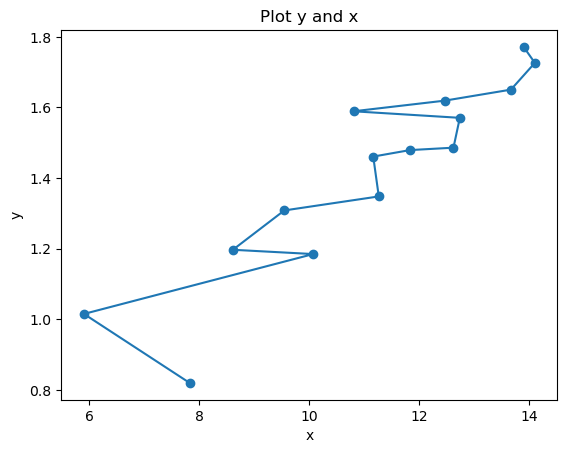

In [946]:
plt.plot(df['y'],df['x'])
plt.scatter(df['y'],df['x'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot y and x')
plt.show()

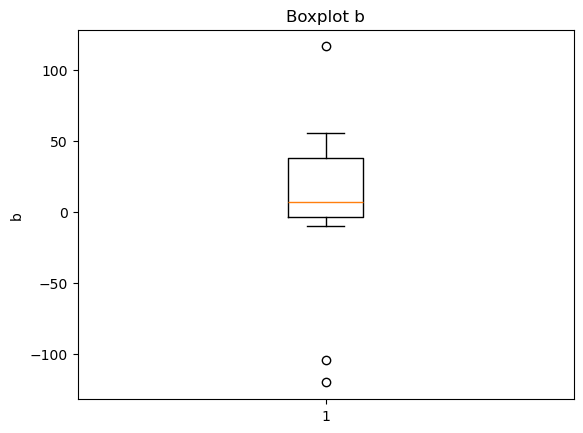

In [947]:
plt.boxplot(df['b'][1:])
plt.ylabel('b')
plt.title('Boxplot b')
plt.show()

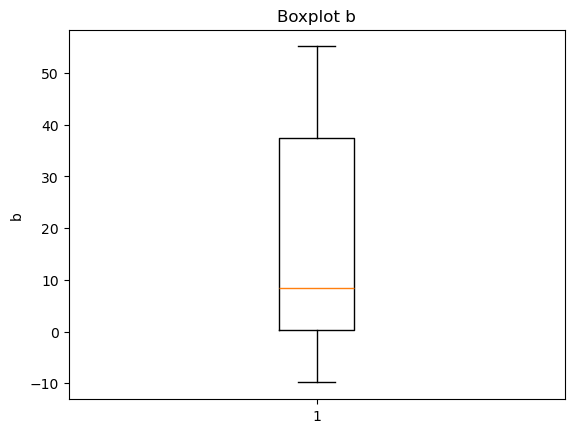

In [948]:
plt.boxplot(sorted(df['b'])[3:14])
plt.ylabel('b')
plt.title('Boxplot b')
plt.show()

In [949]:
b=sum(sorted(df['b'])[3:14])/len(sorted(df['b'])[3:14])
print('b = ', b)

b =  18.022284111642254


In [950]:
df['k']=df['y']-b*df['x']
df['a']=np.exp(df['k'])
df

,v,P,y,x,change_y,change_x,b,k,a
0,2.27,2500,7.824046,0.819780,0.000000,0.000000,NaN,-6.950259,9.583869e-04
1,2.76,365,5.899897,1.015231,-1.924149,0.195451,-9.844668,-12.396878,4.131465e-06
2,3.27,23700,10.073230,1.184790,4.173333,0.169559,24.612822,-11.279391,1.263056e-05
3,3.31,5491,8.610866,1.196948,-1.462365,0.012158,-120.278012,-12.960875,2.350518e-06
4,3.70,14000,9.546813,1.308333,0.935947,0.111385,8.402837,-14.032333,8.050728e-07
5,3.85,78200,11.267025,1.348073,1.720212,0.039740,43.286313,-13.028332,2.197188e-06
6,4.31,70700,11.166201,1.460938,-0.100824,0.112865,-0.893318,-15.163237,2.598303e-07
7,4.39,138000,11.835009,1.479329,0.668808,0.018391,36.365416,-14.825883,3.640835e-07
8,4.42,304500,12.626426,1.486140,0.791417,0.006810,116.206006,-14.157205,7.105650e-07
9,4.81,341948,12.742414,1.570697,0.115988,0.084557,1.371703,-15.565135,1.738392e-07


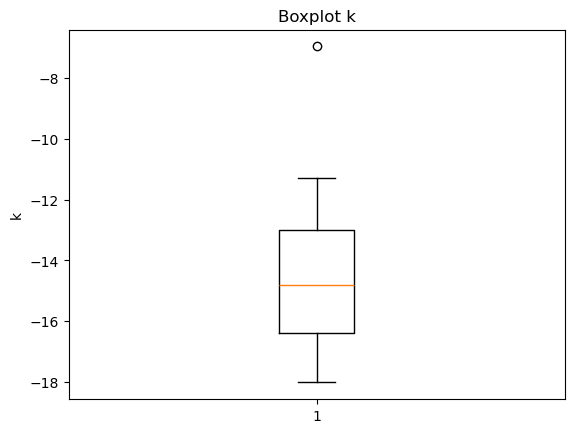

In [951]:
plt.boxplot(df['k'])
plt.ylabel('k')
plt.title('Boxplot k')
plt.show()

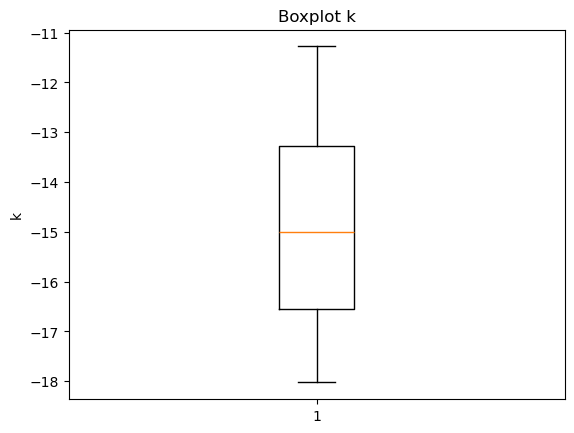

In [952]:
plt.boxplot(df['k'][1:])
plt.ylabel('k')
plt.title('Boxplot k')
plt.show()

In [953]:
print('k = ',df['k'][1:].mean())

k =  -14.932966381759229


In [954]:
print('a = ' , math.exp(df['k'][1:].mean()))

a =  3.2711096478604655e-07


Model $P = 3.27v^{18.02}$ or $y = 18.02x-14.93$

In [955]:
df['y_amodel1'] = 18.02*(df['x'])-14.93
df

,v,P,y,x,change_y,change_x,b,k,a,y_amodel1
0,2.27,2500,7.824046,0.819780,0.000000,0.000000,NaN,-6.950259,9.583869e-04,-0.157567
1,2.76,365,5.899897,1.015231,-1.924149,0.195451,-9.844668,-12.396878,4.131465e-06,3.364457
2,3.27,23700,10.073230,1.184790,4.173333,0.169559,24.612822,-11.279391,1.263056e-05,6.419916
3,3.31,5491,8.610866,1.196948,-1.462365,0.012158,-120.278012,-12.960875,2.350518e-06,6.639006
4,3.70,14000,9.546813,1.308333,0.935947,0.111385,8.402837,-14.032333,8.050728e-07,8.646157
5,3.85,78200,11.267025,1.348073,1.720212,0.039740,43.286313,-13.028332,2.197188e-06,9.362278
6,4.31,70700,11.166201,1.460938,-0.100824,0.112865,-0.893318,-15.163237,2.598303e-07,11.396101
7,4.39,138000,11.835009,1.479329,0.668808,0.018391,36.365416,-14.825883,3.640835e-07,11.727513
8,4.42,304500,12.626426,1.486140,0.791417,0.006810,116.206006,-14.157205,7.105650e-07,11.850237
9,4.81,341948,12.742414,1.570697,0.115988,0.084557,1.371703,-15.565135,1.738392e-07,13.373961


# Least Square Method 

In [956]:
b = e1(df)
k = e2(df)
print('b = ',b)
print('k = ',k)

b =  8.0062867618689
k =  -0.22658027132370503


In [957]:
print('a = ' , math.exp(k))

a =  0.797255343002653


Model $P = 0.797v^{8.006}$ or $y = 8.006x-0.2265$ 

In [958]:
df['y_amodel2'] = 8.006*df['x']-0.2265
df

,v,P,y,x,change_y,change_x,b,k,a,y_amodel1,xy,xsquare,y_amodel2
0,2.27,2500,7.824046,0.819780,0.000000,0.000000,NaN,-6.950259,9.583869e-04,-0.157567,6.413995,0.672039,6.336657
1,2.76,365,5.899897,1.015231,-1.924149,0.195451,-9.844668,-12.396878,4.131465e-06,3.364457,5.989757,1.030693,7.901437
2,3.27,23700,10.073230,1.184790,4.173333,0.169559,24.612822,-11.279391,1.263056e-05,6.419916,11.934662,1.403727,9.258929
3,3.31,5491,8.610866,1.196948,-1.462365,0.012158,-120.278012,-12.960875,2.350518e-06,6.639006,10.306760,1.432685,9.356267
4,3.70,14000,9.546813,1.308333,0.935947,0.111385,8.402837,-14.032333,8.050728e-07,8.646157,12.490408,1.711735,10.248013
5,3.85,78200,11.267025,1.348073,1.720212,0.039740,43.286313,-13.028332,2.197188e-06,9.362278,15.188774,1.817301,10.566174
6,4.31,70700,11.166201,1.460938,-0.100824,0.112865,-0.893318,-15.163237,2.598303e-07,11.396101,16.313126,2.134340,11.469769
7,4.39,138000,11.835009,1.479329,0.668808,0.018391,36.365416,-14.825883,3.640835e-07,11.727513,17.507875,2.188415,11.617010
8,4.42,304500,12.626426,1.486140,0.791417,0.006810,116.206006,-14.157205,7.105650e-07,11.850237,18.764633,2.208611,11.671534
9,4.81,341948,12.742414,1.570697,0.115988,0.084557,1.371703,-15.565135,1.738392e-07,13.373961,20.014472,2.467089,12.348501


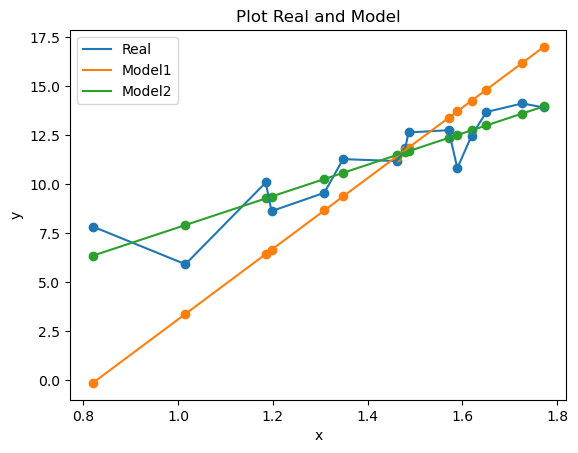

In [959]:
plt.plot(df['x'],df['y'],label='Real')
plt.plot(df['x'],df['y_amodel1'],label='Model1')
plt.plot(df['x'],df['y_amodel2'],label='Model2')
plt.legend()
plt.scatter(df['x'],df['y'],label='Real')
plt.scatter(df['x'],df['y_amodel1'],label='Model1')
plt.scatter(df['x'],df['y_amodel2'],label='Model2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot Real and Model')
plt.show()

# b. Problem 4b in Section 3.1

# Approximate by graph 

$P = alnv$

$P = ax$

$a = \frac {P}{x}$

In [960]:
df['a2'] = df['P']/df['x']

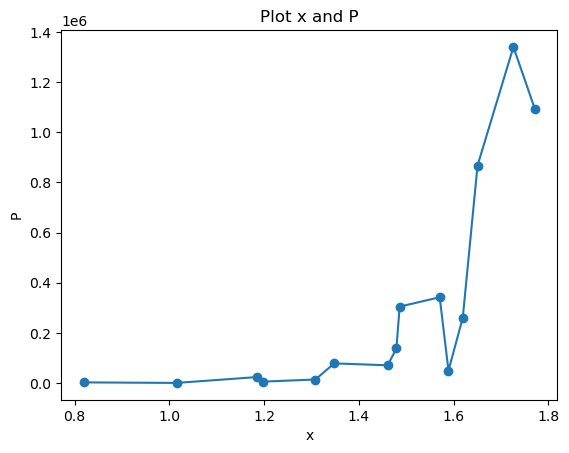

In [961]:
plt.plot(df['x'],df['P'])
plt.scatter(df['x'],df['P'])
plt.xlabel('x')
plt.ylabel('P')
plt.title('Plot x and P')
plt.show()

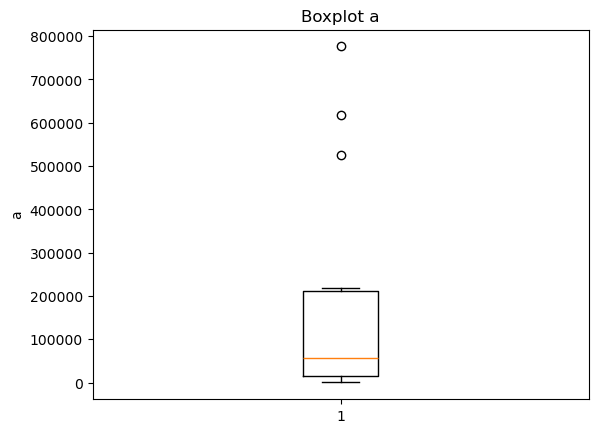

In [962]:
plt.boxplot(df['a2'])
plt.ylabel('a')
plt.title('Boxplot a')
plt.show()

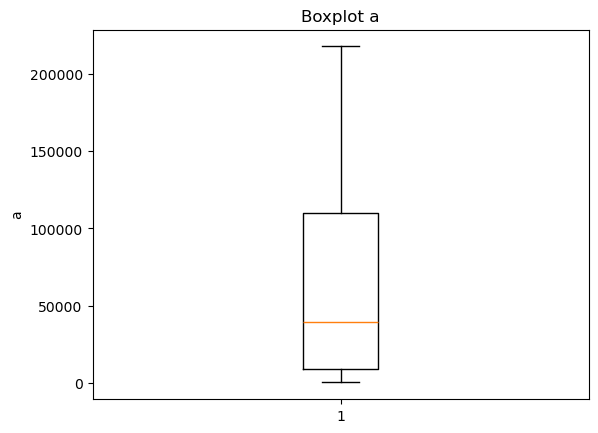

In [963]:
plt.boxplot(sorted(df['a2'])[:-3])
plt.ylabel('a')
plt.title('Boxplot a')
plt.show()

In [964]:
print('a = ',sum(sorted(df['a2'])[:-3])/len(sorted(df['a2'])[:-3]))

a =  71061.07123697703


$P=71061.07(lnv)=71061.07x$

In [965]:
df['p_bmodel1'] = 71061.07*df['x']
df

,v,P,y,x,change_y,change_x,b,k,a,y_amodel1,xy,xsquare,y_amodel2,a2,p_bmodel1
0,2.27,2500,7.824046,0.819780,0.000000,0.000000,NaN,-6.950259,9.583869e-04,-0.157567,6.413995,0.672039,6.336657,3049.599300,58254.431990
1,2.76,365,5.899897,1.015231,-1.924149,0.195451,-9.844668,-12.396878,4.131465e-06,3.364457,5.989757,1.030693,7.901437,359.524202,72143.378398
2,3.27,23700,10.073230,1.184790,4.173333,0.169559,24.612822,-11.279391,1.263056e-05,6.419916,11.934662,1.403727,9.258929,20003.545187,84192.444053
3,3.31,5491,8.610866,1.196948,-1.462365,0.012158,-120.278012,-12.960875,2.350518e-06,6.639006,10.306760,1.432685,9.356267,4587.500151,85056.419073
4,3.70,14000,9.546813,1.308333,0.935947,0.111385,8.402837,-14.032333,8.050728e-07,8.646157,12.490408,1.711735,10.248013,10700.641144,92971.530080
5,3.85,78200,11.267025,1.348073,1.720212,0.039740,43.286313,-13.028332,2.197188e-06,9.362278,15.188774,1.817301,10.566174,58008.721633,95795.520356
6,4.31,70700,11.166201,1.460938,-0.100824,0.112865,-0.893318,-15.163237,2.598303e-07,11.396101,16.313126,2.134340,11.469769,48393.569501,103815.810670
7,4.39,138000,11.835009,1.479329,0.668808,0.018391,36.365416,-14.825883,3.640835e-07,11.727513,17.507875,2.188415,11.617010,93285.522569,105122.717759
8,4.42,304500,12.626426,1.486140,0.791417,0.006810,116.206006,-14.157205,7.105650e-07,11.850237,18.764633,2.208611,11.671534,204893.255191,105606.676974
9,4.81,341948,12.742414,1.570697,0.115988,0.084557,1.371703,-15.565135,1.738392e-07,13.373961,20.014472,2.467089,12.348501,217704.612466,111615.415443


# Least Square Method 

$SSE = \Sigma_{i=1}^{n}(P_i-ax_i)^2$

$\frac {d_{SSE}}{d_a} = -2\Sigma_{i=1}^{n}(x_i)(P_i-ax_i) = 0$

$\Sigma_{i=1}^{n}(x_i)(P_i)-a\Sigma_{i=1}^{n}(x^2_i) = 0$

$a=\frac{\Sigma_{i=1}^{n}(x_i)(P_i)}{\Sigma_{i=1}^{n}(x^2_i)}$



In [966]:
df['xp']=df['P']*df['x']
df['x_square']=df['x']**2
df

,v,P,y,x,change_y,change_x,b,k,a,y_amodel1,xy,xsquare,y_amodel2,a2,p_bmodel1,xp,x_square
0,2.27,2500,7.824046,0.819780,0.000000,0.000000,NaN,-6.950259,9.583869e-04,-0.157567,6.413995,0.672039,6.336657,3049.599300,58254.431990,2.049450e+03,0.672039
1,2.76,365,5.899897,1.015231,-1.924149,0.195451,-9.844668,-12.396878,4.131465e-06,3.364457,5.989757,1.030693,7.901437,359.524202,72143.378398,3.705592e+02,1.030693
2,3.27,23700,10.073230,1.184790,4.173333,0.169559,24.612822,-11.279391,1.263056e-05,6.419916,11.934662,1.403727,9.258929,20003.545187,84192.444053,2.807952e+04,1.403727
3,3.31,5491,8.610866,1.196948,-1.462365,0.012158,-120.278012,-12.960875,2.350518e-06,6.639006,10.306760,1.432685,9.356267,4587.500151,85056.419073,6.572443e+03,1.432685
4,3.70,14000,9.546813,1.308333,0.935947,0.111385,8.402837,-14.032333,8.050728e-07,8.646157,12.490408,1.711735,10.248013,10700.641144,92971.530080,1.831666e+04,1.711735
5,3.85,78200,11.267025,1.348073,1.720212,0.039740,43.286313,-13.028332,2.197188e-06,9.362278,15.188774,1.817301,10.566174,58008.721633,95795.520356,1.054193e+05,1.817301
6,4.31,70700,11.166201,1.460938,-0.100824,0.112865,-0.893318,-15.163237,2.598303e-07,11.396101,16.313126,2.134340,11.469769,48393.569501,103815.810670,1.032883e+05,2.134340
7,4.39,138000,11.835009,1.479329,0.668808,0.018391,36.365416,-14.825883,3.640835e-07,11.727513,17.507875,2.188415,11.617010,93285.522569,105122.717759,2.041474e+05,2.188415
8,4.42,304500,12.626426,1.486140,0.791417,0.006810,116.206006,-14.157205,7.105650e-07,11.850237,18.764633,2.208611,11.671534,204893.255191,105606.676974,4.525295e+05,2.208611
9,4.81,341948,12.742414,1.570697,0.115988,0.084557,1.371703,-15.565135,1.738392e-07,13.373961,20.014472,2.467089,12.348501,217704.612466,111615.415443,5.370967e+05,2.467089


In [967]:
a = sum(df['xp'])/sum(df['x_square'])
print('a = ',a)

a =  245927.59976101376


Model $P= 245927.6 lnv$

In [968]:
df['p_bmodel2'] = 245927.6*df['x']
df

,v,P,y,x,change_y,change_x,b,k,a,y_amodel1,xy,xsquare,y_amodel2,a2,p_bmodel1,xp,x_square,p_bmodel2
0,2.27,2500,7.824046,0.819780,0.000000,0.000000,NaN,-6.950259,9.583869e-04,-0.157567,6.413995,0.672039,6.336657,3049.599300,58254.431990,2.049450e+03,0.672039,201606.486488
1,2.76,365,5.899897,1.015231,-1.924149,0.195451,-9.844668,-12.396878,4.131465e-06,3.364457,5.989757,1.030693,7.901437,359.524202,72143.378398,3.705592e+02,1.030693,249673.244512
2,3.27,23700,10.073230,1.184790,4.173333,0.169559,24.612822,-11.279391,1.263056e-05,6.419916,11.934662,1.403727,9.258929,20003.545187,84192.444053,2.807952e+04,1.403727,291372.557493
3,3.31,5491,8.610866,1.196948,-1.462365,0.012158,-120.278012,-12.960875,2.350518e-06,6.639006,10.306760,1.432685,9.356267,4587.500151,85056.419073,6.572443e+03,1.432685,294362.595541
4,3.70,14000,9.546813,1.308333,0.935947,0.111385,8.402837,-14.032333,8.050728e-07,8.646157,12.490408,1.711735,10.248013,10700.641144,92971.530080,1.831666e+04,1.711735,321755.150338
5,3.85,78200,11.267025,1.348073,1.720212,0.039740,43.286313,-13.028332,2.197188e-06,9.362278,15.188774,1.817301,10.566174,58008.721633,95795.520356,1.054193e+05,1.817301,331528.393986
6,4.31,70700,11.166201,1.460938,-0.100824,0.112865,-0.893318,-15.163237,2.598303e-07,11.396101,16.313126,2.134340,11.469769,48393.569501,103815.810670,1.032883e+05,2.134340,359284.952508
7,4.39,138000,11.835009,1.479329,0.668808,0.018391,36.365416,-14.825883,3.640835e-07,11.727513,17.507875,2.188415,11.617010,93285.522569,105122.717759,2.041474e+05,2.188415,363807.886427
8,4.42,304500,12.626426,1.486140,0.791417,0.006810,116.206006,-14.157205,7.105650e-07,11.850237,18.764633,2.208611,11.671534,204893.255191,105606.676974,4.525295e+05,2.208611,365482.768724
9,4.81,341948,12.742414,1.570697,0.115988,0.084557,1.371703,-15.565135,1.738392e-07,13.373961,20.014472,2.467089,12.348501,217704.612466,111615.415443,5.370967e+05,2.467089,386277.764224


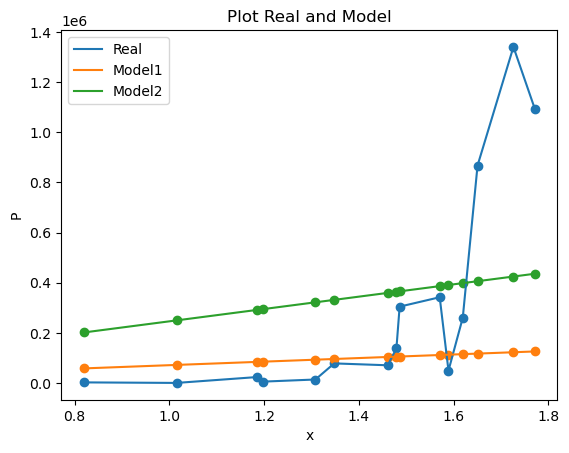

In [969]:
plt.plot(df['x'],df['P'],label='Real')
plt.plot(df['x'],df['p_bmodel1'],label='Model1')
plt.plot(df['x'],df['p_bmodel2'],label='Model2')
plt.legend()
plt.scatter(df['x'],df['P'],label='Real')
plt.scatter(df['x'],df['p_bmodel1'],label='Model1')
plt.scatter(df['x'],df['p_bmodel2'],label='Model2')
plt.xlabel('x')
plt.ylabel('P')
plt.title('Plot Real and Model')
plt.show()

Model 1 = startistic estimate

Model 2 = Least square methos

# Macimize abs error or SSE

In [970]:
def SSE(df):
    S =0
    for i in range(len(df)):
        S =S +(df[i])**2
    return S


In [971]:
df['abs_error_y1']= df['y']-df['y_amodel1']
df['abs_error_y2']= df['y']-df['y_amodel2']
df['abs_error_p1']= df['P']-df['p_bmodel1']
df['abs_error_p2']= df['P']-df['p_bmodel2']

In [972]:
print('Part a :')
print('Maximuun ABS error model1 = ', max(df['abs_error_y1']))
print('SSE model1 = ', SSE(df['abs_error_y1']))
print('Maximuun ABS error model2 = ', max(df['abs_error_y2']))
print('SSE model2 = ', SSE(df['abs_error_y2']))

Part a :
Maximuun ABS error model1 =  7.981613447346821
SSE model1 =  119.5960280098063
Maximuun ABS error model2 =  1.4873886799208407
SSE model2 =  13.289821942125206


In [973]:
print('Part b :')
print('Maximuun ABS error model1 = ', max(df['abs_error_p1']))
print('SSE model1 = ', SSE(df['abs_error_p1']))
print('Maximuun ABS error model2 = ', max(df['abs_error_p2']))
print('SSE model2 = ', SSE(df['abs_error_p2']))

Part b :
Maximuun ABS error model1 =  1217325.0247879876
SSE model1 =  3123501707255.941
Maximuun ABS error model2 =  915447.3970916893
SSE model2 =  2173807778214.5288


In [974]:
def deviation(a,n):
    return sqrt(a/n)


In [975]:
def d(df):
    S =[]
    for i in range(len(df)):
        S.append(df[i])
    return max(S)

# Part A: 

$D\le c_{max} \le d_{max}$

In [976]:
print('D = ',deviation(SSE(df['abs_error_y1']),len(df)))
print('d_max = ',d(df['abs_error_y1']))

D =  2.82366225565082
d_max =  7.981613447346821


Model 1 :   $2.82\le c_{max} \le 7.98$

In [977]:
print('D = ',deviation(SSE(df['abs_error_y2']),len(df)))
print('d_max = ',d(df['abs_error_y2']))

D =  0.941269424487492
d_max =  1.4873886799208407


Model 2 :   $0.94\le c_{max} \le 1.49$

# PartB:

In [978]:
print('D = ',deviation(SSE(df['abs_error_p1']),len(df)))
print('d_max = ',d(df['abs_error_p1']))

D =  456326.031637903
d_max =  1217325.0247879876


Model 1 :   $456326.03\le c_{max} \le 1217325.02$

In [979]:
print('D = ',deviation(SSE(df['abs_error_p2']),len(df)))
print('d_max = ',d(df['abs_error_p2']))

D =  380684.276727625
d_max =  915447.3970916893


Model 2 :   $ 380684.27\le c_{max} \le 915447.40$

# 10. a. In the following data, W represents the weight of a fish (bass) and I represents its length.Fit the model W = $kl^3$ to the data using the least-squares criterion.

In [980]:
data = {'l': [14.5 ,12.5 ,17.25 ,14.5 ,12.625 ,17.75 ,14.125 ,12.625],
        'w': [  27 ,17 ,41, 26, 17 ,49 ,23 ,16]}
df = pd.DataFrame(data)
df

,l,w
0,14.500,27
1,12.500,17
2,17.250,41
3,14.500,26
4,12.625,17
5,17.750,49
6,14.125,23
7,12.625,16


In [981]:
df['l_cube']=df['l']**3
df

,l,w,l_cube
0,14.500,27,3048.625000
1,12.500,17,1953.125000
2,17.250,41,5132.953125
3,14.500,26,3048.625000
4,12.625,17,2012.306641
5,17.750,49,5592.359375
6,14.125,23,2818.158203
7,12.625,16,2012.306641


$SSE = \Sigma_{i=1}^{n}(W_i-kl^3_i)^2$

$\frac {d_{SSE}}{d_k} = -2\Sigma_{i=1}^{n}(l^3_i)(W_i-kl^3_i) = 0$

$\Sigma_{i=1}^{n}(l^3_i)(W_i)-k\Sigma_{i=1}^{n}(l^6_i) = 0$

$k=\frac{\Sigma_{i=1}^{n}(l^3_i)(W_i)}{\Sigma_{i=1}^{n}(l^6_i)}$

In [982]:
df['wl_cube']=df['w']*df['l_cube']
df['l_6']=df['l']**6
df

,l,w,l_cube,wl_cube,l_6
0,14.500,27,3048.625000,82312.875000,9.294114e+06
1,12.500,17,1953.125000,33203.125000,3.814697e+06
2,17.250,41,5132.953125,210451.078125,2.634721e+07
3,14.500,26,3048.625000,79264.250000,9.294114e+06
4,12.625,17,2012.306641,34209.212891,4.049378e+06
5,17.750,49,5592.359375,274025.609375,3.127448e+07
6,14.125,23,2818.158203,64817.638672,7.942016e+06
7,12.625,16,2012.306641,32196.906250,4.049378e+06


In [983]:
a = sum(df['wl_cube'])/sum(df['l_6'])
print('k = ',a)

k =  0.008436760675206318


$W = 0.0084l^3$

In [984]:
df['Model']=0.0084*df['l_cube']
df

,l,w,l_cube,wl_cube,l_6,Model
0,14.500,27,3048.625000,82312.875000,9.294114e+06,25.608450
1,12.500,17,1953.125000,33203.125000,3.814697e+06,16.406250
2,17.250,41,5132.953125,210451.078125,2.634721e+07,43.116806
3,14.500,26,3048.625000,79264.250000,9.294114e+06,25.608450
4,12.625,17,2012.306641,34209.212891,4.049378e+06,16.903376
5,17.750,49,5592.359375,274025.609375,3.127448e+07,46.975819
6,14.125,23,2818.158203,64817.638672,7.942016e+06,23.672529
7,12.625,16,2012.306641,32196.906250,4.049378e+06,16.903376


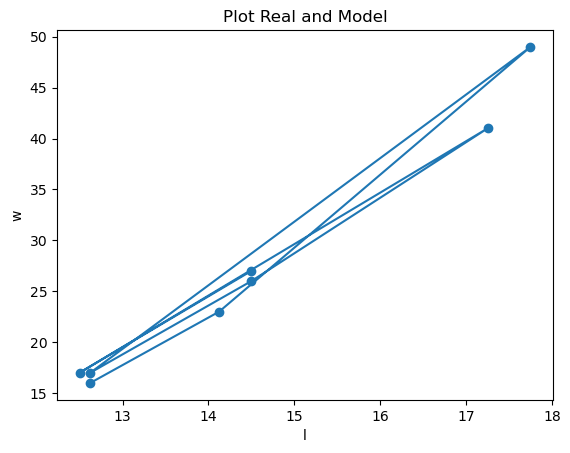

In [985]:
plt.plot(df['l'],df['w'],label='Real')
plt.scatter(df['l'],df['w'],label='Real')
plt.xlabel('l')
plt.ylabel('w')
plt.title('Plot Real and Model')
plt.show()

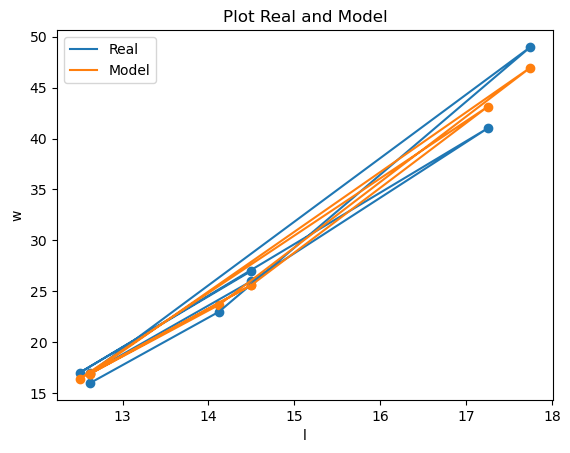

In [986]:
plt.plot(df['l'],df['w'],label='Real')
plt.plot(df['l'],df['Model'],label='Model')
plt.legend()
plt.scatter(df['l'],df['w'],label='Real')
plt.scatter(df['l'],df['Model'],label='Model')
plt.xlabel('l')
plt.ylabel('w')
plt.title('Plot Real and Model')
plt.show()

# b. In the following data, g represents the girth of a fish. Fit the model $W = klg^2$ to the datausing the least-squares criterion.

$SSE = \Sigma_{i=1}^{n}(W_i-kl_ig^2_i)^2$

$\frac {d_{SSE}}{d_k} = -2\Sigma_{i=1}^{n}(l_ig^2_i)(W_i-kl_ig^2_i) = 0$

$\Sigma_{i=1}^{n}(l_ig^2_i)(W_i)-k\Sigma_{i=1}^{n}(l^2_ig^4_i) = 0$

$k=\frac{\Sigma_{i=1}^{n}(l_ig^2_i)(W_i)}{\Sigma_{i=1}^{n}(l^2_ig^4_i)}$

In [987]:
df['g']=[ 9.75 ,8.375 ,11.0 ,9.75 ,8.5 ,12.5 ,9.0 ,8.5]

In [988]:
df['lg_2']=df['l']*df['g']**2
df['wlg_square']=df['w']*df['l']*df['g']**2
df['l_2g_4']=(df['g']**4)*df['l']**2
df

,l,w,l_cube,wl_cube,l_6,Model,g,lg_2,wlg_square,l_2g_4
0,14.500,27,3048.625000,82312.875000,9.294114e+06,25.608450,9.750,1378.406250,37216.968750,1.900004e+06
1,12.500,17,1953.125000,33203.125000,3.814697e+06,16.406250,8.375,876.757812,14904.882812,7.687043e+05
2,17.250,41,5132.953125,210451.078125,2.634721e+07,43.116806,11.000,2087.250000,85577.250000,4.356613e+06
3,14.500,26,3048.625000,79264.250000,9.294114e+06,25.608450,9.750,1378.406250,35838.562500,1.900004e+06
4,12.625,17,2012.306641,34209.212891,4.049378e+06,16.903376,8.500,912.156250,15506.656250,8.320290e+05
5,17.750,49,5592.359375,274025.609375,3.127448e+07,46.975819,12.500,2773.437500,135898.437500,7.691956e+06
6,14.125,23,2818.158203,64817.638672,7.942016e+06,23.672529,9.000,1144.125000,26314.875000,1.309022e+06
7,12.625,16,2012.306641,32196.906250,4.049378e+06,16.903376,8.500,912.156250,14594.500000,8.320290e+05


In [989]:
a = sum(df['wlg_square'])/sum(df['l_2g_4'])
print('k = ',a)

k =  0.018675110215167733


Model : $W = 0.02lg^2$

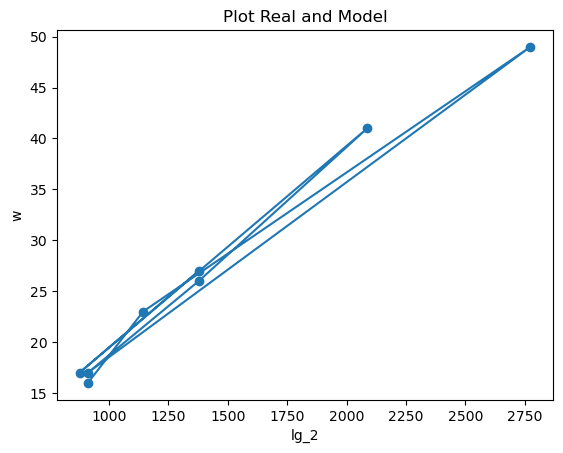

In [990]:
plt.plot(df['lg_2'],df['w'],label='Real')
plt.scatter(df['lg_2'],df['w'],label='Real')
plt.xlabel('lg_2')
plt.ylabel('w')
plt.title('Plot Real and Model')
plt.show()

In [991]:
df['Model2'] = 0.02 * df['lg_2']
df

,l,w,l_cube,wl_cube,l_6,Model,g,lg_2,wlg_square,l_2g_4,Model2
0,14.500,27,3048.625000,82312.875000,9.294114e+06,25.608450,9.750,1378.406250,37216.968750,1.900004e+06,27.568125
1,12.500,17,1953.125000,33203.125000,3.814697e+06,16.406250,8.375,876.757812,14904.882812,7.687043e+05,17.535156
2,17.250,41,5132.953125,210451.078125,2.634721e+07,43.116806,11.000,2087.250000,85577.250000,4.356613e+06,41.745000
3,14.500,26,3048.625000,79264.250000,9.294114e+06,25.608450,9.750,1378.406250,35838.562500,1.900004e+06,27.568125
4,12.625,17,2012.306641,34209.212891,4.049378e+06,16.903376,8.500,912.156250,15506.656250,8.320290e+05,18.243125
5,17.750,49,5592.359375,274025.609375,3.127448e+07,46.975819,12.500,2773.437500,135898.437500,7.691956e+06,55.468750
6,14.125,23,2818.158203,64817.638672,7.942016e+06,23.672529,9.000,1144.125000,26314.875000,1.309022e+06,22.882500
7,12.625,16,2012.306641,32196.906250,4.049378e+06,16.903376,8.500,912.156250,14594.500000,8.320290e+05,18.243125


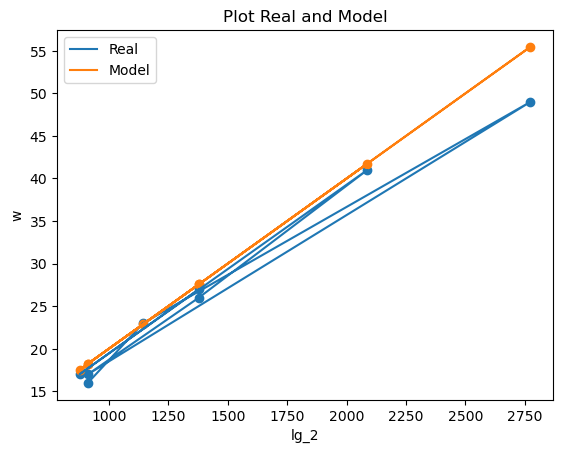

In [992]:
plt.plot(df['lg_2'],df['w'],label='Real')
plt.plot(df['lg_2'],df['Model2'],label='Model')
plt.legend()
plt.scatter(df['lg_2'],df['w'],label='Real')
plt.scatter(df['lg_2'],df['Model2'],label='Model')
plt.xlabel('lg_2')
plt.ylabel('w')
plt.title('Plot Real and Model')
plt.show()